In [174]:
import yfinance as yf
import pandas as pd
import numpy as np
import re

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style


## import model objects
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [175]:
df= pd.read_csv("../../Data and data related codes/dataset_reg.csv")

In [176]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df

,Date,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,...,F_change_in_price,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower
0,2019-12-27 00:00:00+00:00,0.762782,0.762893,0.764976,0.762236,0,0.002726,0.002726,0.000000,0.000880,...,-0.090000,52.381067,65.573745,-34.426255,0.064377,0.059989,3.197354,1.576816e+06,9.664403,8.788597
1,2019-12-30 00:00:00+00:00,0.764859,0.764912,0.766107,0.764316,0,0.002019,0.002019,0.000000,0.001024,...,-0.110000,41.843453,47.541004,-52.458996,0.050503,0.058074,1.536777,1.152860e+06,9.666881,8.805119
2,2019-12-31 00:00:00+00:00,0.765814,0.765662,0.772016,0.765650,0,0.000750,0.000750,0.000000,0.001026,...,0.050000,47.393950,47.058846,-52.941154,0.042514,0.054939,-0.214587,1.327683e+06,9.668690,8.832310
3,2020-01-02 00:00:00+00:00,0.770707,0.770832,0.771087,0.768817,0,0.005170,0.005170,0.000000,0.001370,...,0.120000,58.391028,67.391390,-32.608610,0.043967,0.052732,2.058511,1.888014e+06,9.665091,8.888909
4,2020-01-03 00:00:00+00:00,0.770196,0.770238,0.771533,0.768988,0,-0.000594,0.000000,0.000594,0.001131,...,-0.210000,41.059363,14.285812,-85.714188,0.030140,0.048192,-1.916936,8.839196e+05,9.648241,8.931759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,2024-11-21 00:00:00+00:00,0.715922,0.715922,0.717751,0.715436,0,-0.000667,0.000000,0.000667,0.001153,...,0.070001,43.775308,52.293630,-47.706370,0.038321,0.050747,1.886791,5.855903e+07,11.562331,10.158669
1235,2024-11-22 00:00:00+00:00,0.715308,0.715308,0.716379,0.713435,0,-0.000614,0.000000,0.000614,0.001093,...,0.380000,58.535056,81.481498,-18.518502,0.054790,0.051555,-0.089359,6.146381e+07,11.576416,10.155584
1236,2024-11-25 00:00:00+00:00,0.717731,0.717731,0.718030,0.713949,0,0.002423,0.002423,0.000000,0.001199,...,0.219999,64.721577,86.813106,-13.186894,0.084617,0.058168,4.014595,6.271275e+07,11.582508,10.152492
1237,2024-11-26 00:00:00+00:00,0.709300,0.709300,0.711521,0.705398,0,-0.008430,0.000000,0.008430,0.000948,...,-0.299999,52.416595,53.846186,-46.153814,0.083091,0.063152,1.185051,6.146384e+07,11.590143,10.213857


In [177]:
df.dtypes

Date                 datetime64[ns, UTC]
CADUSD=X_Open                    float64
CADUSD=X_Close                   float64
CADUSD=X_High                    float64
CADUSD=X_Low                     float64
                            ...         
F_MACD_EMA                       float64
F_ROC                            float64
F_PVT                            float64
F_Bollinger_Upper                float64
F_Bollinger_Lower                float64
Length: 152, dtype: object

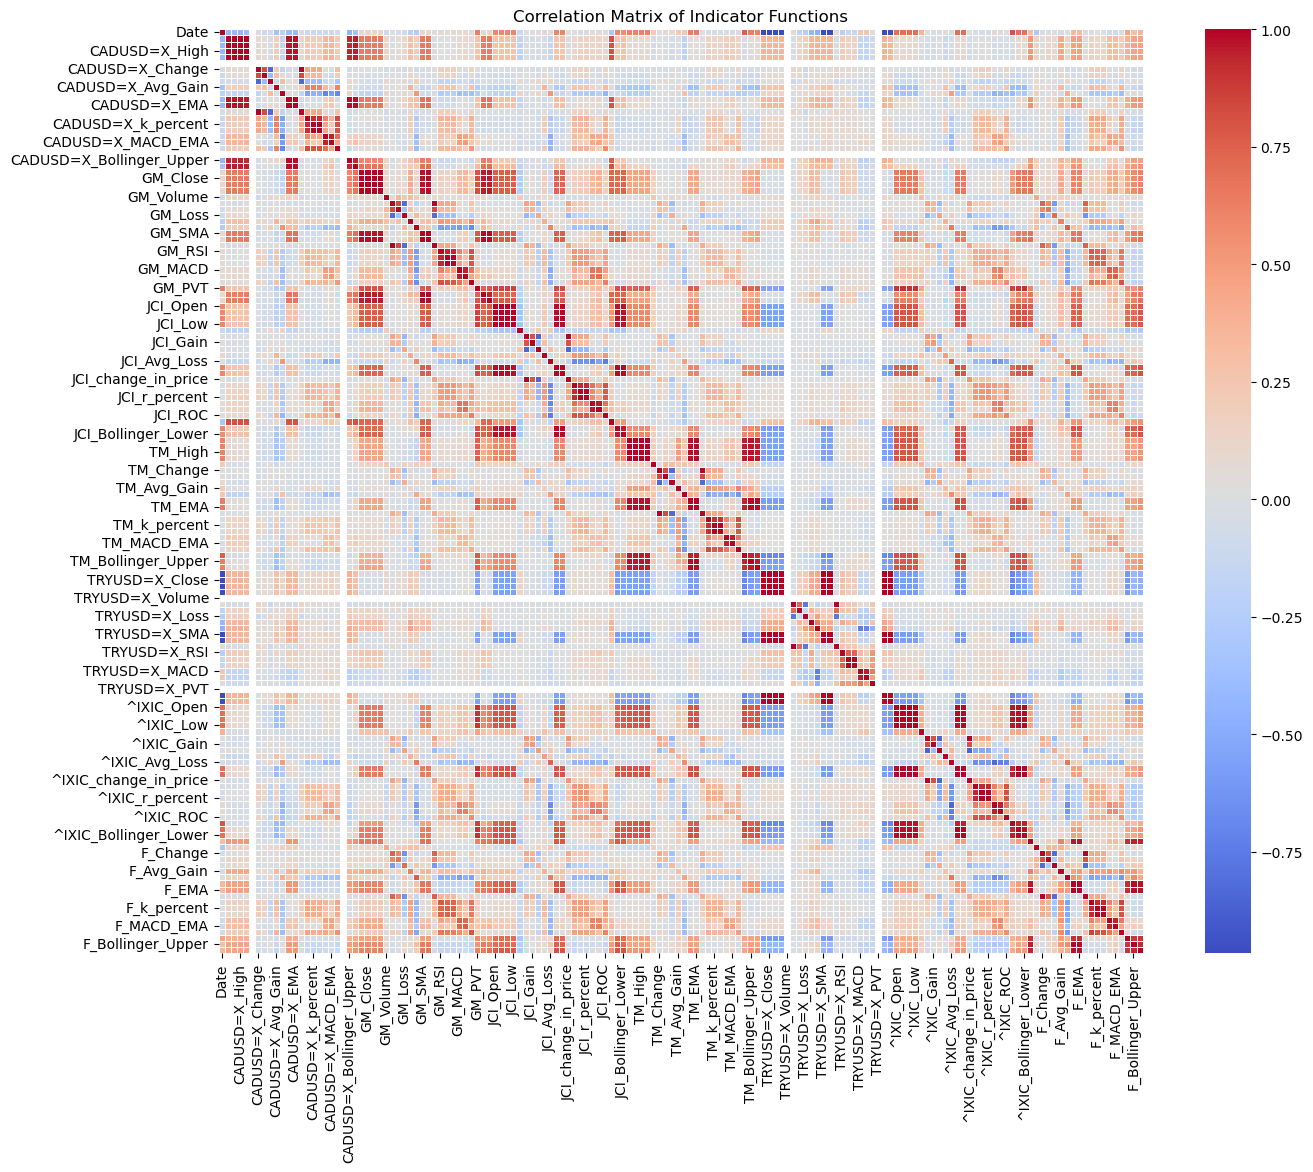

In [178]:
# Calculate the correlation matrix and visualize
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Indicator Functions')
plt.show()

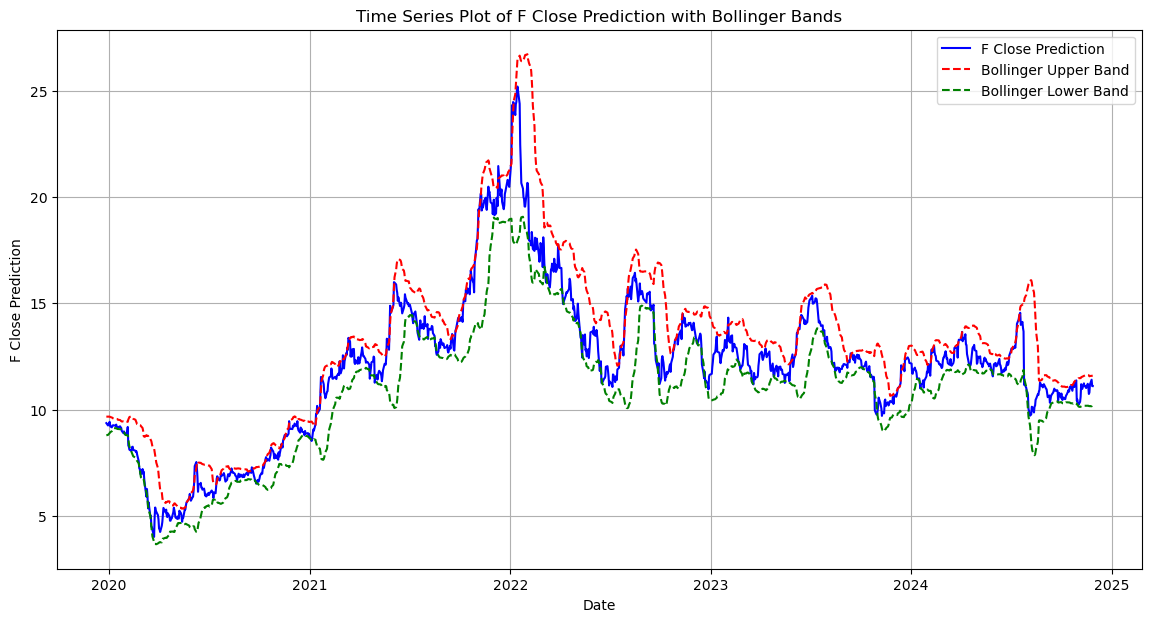

In [179]:
# Plot the time series for F_Close_pred with Bollinger Bands
plt.figure(figsize=(14, 7))

# Plot the predicted close prices
plt.plot(df['Date'], df['F_Close_pred'], label='F Close Prediction', color='blue')

# Plot Bollinger Bands
plt.plot(df['Date'], df['F_Bollinger_Upper'], label='Bollinger Upper Band', color='red', linestyle='--')
plt.plot(df['Date'], df['F_Bollinger_Lower'], label='Bollinger Lower Band', color='green', linestyle='--')

# Add titles and labels
plt.title('Time Series Plot of F Close Prediction with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('F Close Prediction')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import mean_squared_error
import datetime


end_date = df['Date'].max()
start_date = end_date - pd.DateOffset(months=2)
df_last_2_months = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Step 2: Prepare features (X) and target (y)
X = df_last_2_months.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
y = df_last_2_months['F_Close_pred']

In [181]:
# Standardize and remove skewness
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
power_transformer = PowerTransformer()
X_transformed = power_transformer.fit_transform(X_scaled)

In [182]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 3: Split data - keep the last 1 week as an unseen test set
split_index = len(X_transformed) - 7
X_train_val, X_unseen_test = X_transformed[:split_index], X_transformed[split_index:]
y_train_val, y_unseen_test = y[:split_index], y[split_index:]

# Step 4: Set up parameter grids for hyperparameter tuning
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
elastic_net_params = {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}

# Initialize models
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# GridSearchCV with TimeSeriesSplit
ridge_cv = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=tscv)
lasso_cv = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=tscv)
elastic_net_cv = GridSearchCV(elastic_net, elastic_net_params, scoring='neg_mean_squared_error', cv=tscv)

# Fit models on training and validation set
ridge_cv.fit(X_train_val, y_train_val)
lasso_cv.fit(X_train_val, y_train_val)
elastic_net_cv.fit(X_train_val, y_train_val)

# Step 5: Collect MSE and best parameters for each model in a table
results = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'ElasticNet'],
    'Best Parameters': [ridge_cv.best_params_, lasso_cv.best_params_, elastic_net_cv.best_params_],
    'Best MSE': [
        -ridge_cv.best_score_,  # Convert negative MSE back to positive
        -lasso_cv.best_score_,
        -elastic_net_cv.best_score_
    ]
})

# Display the table
print("Grid Search Results with MSE for Each Model:")
print(results)

# Step 5: Choose the best model based on the lowest MSE
best_model, best_mse = None, float('inf')
for model_cv, name in [(ridge_cv, 'Ridge'), (lasso_cv, 'Lasso'), (elastic_net_cv, 'ElasticNet')]:
    if -model_cv.best_score_ < best_mse:
        best_mse = -model_cv.best_score_
        best_model = model_cv.best_estimator_
print(f"Best model: {best_model}, MSE: {best_mse}")

Grid Search Results with MSE for Each Model:
        Model                   Best Parameters  Best MSE
0       Ridge                   {'alpha': 10.0}  0.043273
1       Lasso                   {'alpha': 0.01}  0.040172
2  ElasticNet  {'alpha': 0.01, 'l1_ratio': 0.5}  0.036940
Best model: ElasticNet(alpha=0.01), MSE: 0.03693971287896934


In [183]:
# Step 5: Collect MSE, AIC, BIC, and AICc for each model in a table
results = []

for model_cv, name in [(ridge_cv, 'Ridge'), (lasso_cv, 'Lasso'), (elastic_net_cv, 'ElasticNet')]:
    best_model = model_cv.best_estimator_
    best_mse = -model_cv.best_score_
    
    # Fit the best model to the entire training and validation set
    best_model.fit(X_train_val, y_train_val)
    
    # Predictions for AIC and BIC calculations
    y_pred_train = best_model.predict(X_train_val)
    residuals = y_train_val - y_pred_train
    
    # Calculate number of parameters (p) for AIC/BIC
    p = np.sum(best_model.coef_ != 0) + 1  # Count non-zero coefficients and intercept
    
    # Calculate AIC, BIC, and AICc
    n = len(y_train_val)  # Sample size
    sse = np.sum(residuals**2)
    
    aic = n * np.log(sse / n) + 2 * p
    bic = n * np.log(sse / n) + p * np.log(n)
    aicc = aic + (2 * p * (p + 1)) / (n - p - 1)
    
    # Store results in a dictionary
    results.append({
        'Model': name,
        'Best Parameters': model_cv.best_params_,
        'Best MSE': best_mse,
        'AIC': aic,
        'BIC': bic,
        'AICc': aicc
    })

# Convert results list to DataFrame for display
results_df = pd.DataFrame(results)

# Display the table
print("Grid Search Results with MSE, AIC, BIC, and AICc for Each Model:")
print(results_df)

Grid Search Results with MSE, AIC, BIC, and AICc for Each Model:
        Model                   Best Parameters  Best MSE         AIC  \
0       Ridge                   {'alpha': 10.0}  0.043273   20.315595   
1       Lasso                   {'alpha': 0.01}  0.040172 -216.057508   
2  ElasticNet  {'alpha': 0.01, 'l1_ratio': 0.5}  0.036940 -236.638519   

          BIC        AICc  
0  253.898692 -368.124772  
1 -190.282822 -188.857508  
2 -202.809243 -175.038519  


Unseen Test MSE: 0.01608237941759622


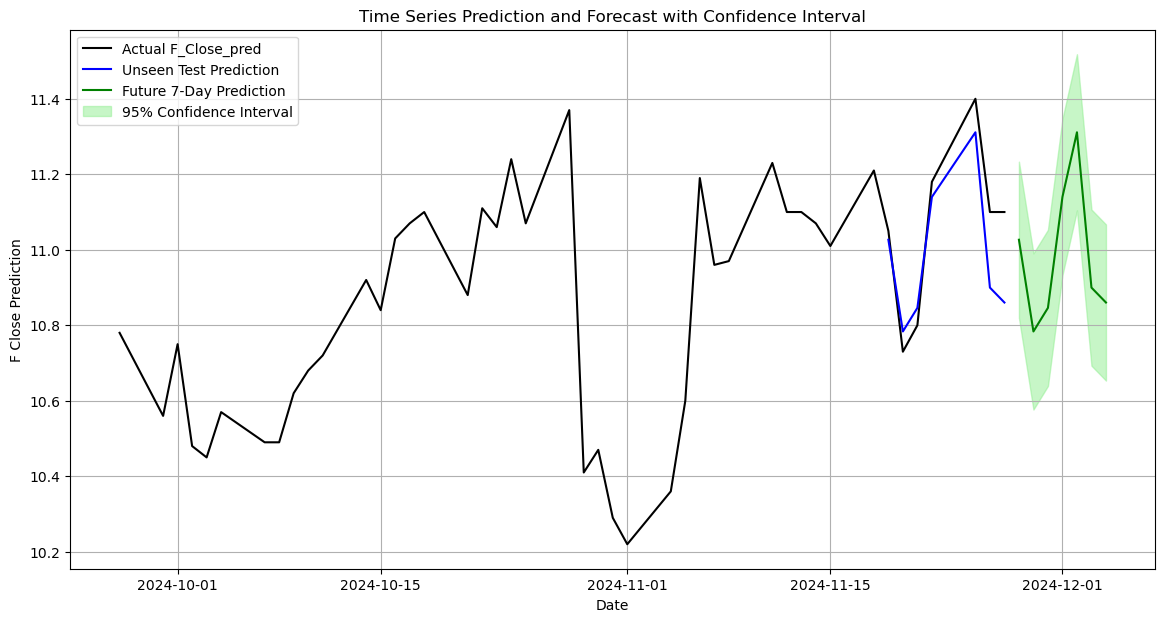

In [184]:
# Step 6: Predict on the last week (unseen test data)
y_unseen_pred = best_model.predict(X_unseen_test)
mse_unseen = mean_squared_error(y_unseen_test, y_unseen_pred)
print(f"Unseen Test MSE: {mse_unseen}")

# Step 7: Forecast the next 7 days with a confidence interval
future_7_days = X_transformed[-7:]  # Use the last week for forecasting
future_predictions = best_model.predict(future_7_days)

# Calculate confidence interval (simple approximation based on prediction standard deviation)
std_dev = np.std(y_unseen_pred - y_unseen_test)
upper_bound = future_predictions + (1.96 * std_dev)
lower_bound = future_predictions - (1.96 * std_dev)

# Plot the results
plt.figure(figsize=(14, 7))
# Actual data
plt.plot(df_last_2_months['Date'], y, label="Actual F_Close_pred", color='black')
# Predictions on unseen test
plt.plot(df_last_2_months['Date'].iloc[-7:], y_unseen_pred, label="Unseen Test Prediction", color='blue')
# Future forecast
future_dates = pd.date_range(df_last_2_months['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
plt.plot(future_dates, future_predictions, label="Future 7-Day Prediction", color='green')
plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label="95% Confidence Interval")

plt.xlabel("Date")
plt.ylabel("F Close Prediction")
plt.title("Time Series Prediction and Forecast with Confidence Interval")
plt.legend()
plt.grid(True)
plt.show()

In [185]:
# Create a DataFrame to compare actual values and predicted values for the last two weeks

# Extract dates for the last two weeks
dates_last_two_weeks = df_last_2_months['Date'].iloc[-14:]

# Extract actual values for the last two weeks
actual_values_last_two_weeks = y.iloc[-14:]

# Initialize predicted values with NaN for the first week of the two-week window
predicted_values_last_two_weeks = [np.nan] * 7 + list(y_unseen_pred)

# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Date': dates_last_two_weeks.values,
    'Actual F_Close_pred': actual_values_last_two_weeks.values,
    'Predicted F_Close_pred': predicted_values_last_two_weeks
})

# Display the comparison table
comparison_df.reset_index(drop=True, inplace=True)  # Reset index for a cleaner display

# Generate future dates for the forecasted 7 days
future_dates = pd.date_range(comparison_df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)



# Create a DataFrame for the forecasted data with NaN for actual values and predictions in predicted column
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Actual F_Close_pred': [np.nan] * 7,  # No actual data for the future
    'Predicted F_Close_pred': future_predictions  # Forecasted predictions
})

# Append the forecasted data to the original comparison_df
comparison_df_with_forecast = pd.concat([comparison_df, forecast_df], ignore_index=True)

# Display the updated table with both the last week's predictions and the future forecast
print(comparison_df_with_forecast)

         Date  Actual F_Close_pred  Predicted F_Close_pred
0  2024-11-08                10.97                     NaN
1  2024-11-11                11.23                     NaN
2  2024-11-12                11.10                     NaN
3  2024-11-13                11.10                     NaN
4  2024-11-14                11.07                     NaN
5  2024-11-15                11.01                     NaN
6  2024-11-18                11.21                     NaN
7  2024-11-19                11.05               11.026577
8  2024-11-20                10.73               10.783623
9  2024-11-21                10.80               10.846126
10 2024-11-22                11.18               11.139897
11 2024-11-25                11.40               11.311227
12 2024-11-26                11.10               10.899812
13 2024-11-27                11.10               10.860290
14 2024-11-28                  NaN               11.026577
15 2024-11-29                  NaN               10.7836

## Backtesting

In [186]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Function to perform 5 backtests
def perform_backtesting_with_metrics(df, best_model, num_tests=5, window_size_months=2, test_days=7):
    backtest_results = []
    start_idx = 0
    total_data_points = len(df)
    
    for i in range(num_tests):
        # Calculate start and end indices for training and testing
        train_start_idx = start_idx
        train_end_idx = start_idx + window_size_months * 30  # Approx. 30 days per month
        test_start_idx = train_end_idx
        test_end_idx = test_start_idx + test_days

        # Ensure we don't exceed data range
        if test_end_idx > total_data_points:
            break

        # Prepare the training and testing datasets
        train_data = df.iloc[train_start_idx:train_end_idx]
        test_data = df.iloc[test_start_idx:test_end_idx]

        # Features and target for training
        X_train = train_data.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
        y_train = train_data['F_Close_pred']

        # Features and target for testing
        X_test = test_data.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
        y_test = test_data['F_Close_pred']

        # Preprocess the data
        X_train_scaled = scaler.fit_transform(X_train)
        X_train_transformed = power_transformer.fit_transform(X_train_scaled)
        X_test_scaled = scaler.transform(X_test)
        X_test_transformed = power_transformer.transform(X_test_scaled)

        # Train the best model on the training data
        best_model.fit(X_train_transformed, y_train)

        # Make predictions on the test data
        y_pred = best_model.predict(X_test_transformed)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Append results to backtest_results
        backtest_results.append({
            'Train Start': train_data['Date'].iloc[0],
            'Train End': train_data['Date'].iloc[-1],
            'Test Start': test_data['Date'].iloc[0],
            'Test End': test_data['Date'].iloc[-1],
            'MSE': mse,
            'RMSE': rmse,
            'R²': r2
        })

        # Move the window forward by the test period
        start_idx += 200

    return backtest_results

# Perform 5 backtests
backtest_results = perform_backtesting_with_metrics(df, best_model, num_tests=5)

# Convert results to a DataFrame and display
backtest_results_df = pd.DataFrame(backtest_results)
print("Backtesting Results with MSE, RMSE, and R²:")
print(backtest_results_df)

# Calculate average metrics across all backtests
average_mse = backtest_results_df['MSE'].mean()
average_rmse = backtest_results_df['RMSE'].mean()
average_r2 = backtest_results_df['R²'].mean()

print(f"\nAverage MSE: {average_mse:.4f}")
print(f"Average RMSE: {average_rmse:.4f}")
print(f"Average R²: {average_r2:.4f}")

/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.645e-02, tolerance: 1.481e-02
  model = cd_fast.enet_coordinate_descent(


Backtesting Results with MSE, RMSE, and R²:
                Train Start                 Train End  \
0 2019-12-27 00:00:00+00:00 2020-03-24 00:00:00+00:00   
1 2020-10-13 00:00:00+00:00 2021-01-07 00:00:00+00:00   
2 2021-07-30 00:00:00+00:00 2021-10-22 00:00:00+00:00   
3 2022-05-16 00:00:00+00:00 2022-08-10 00:00:00+00:00   
4 2023-03-03 00:00:00+00:00 2023-05-26 00:00:00+00:00   

                 Test Start                  Test End       MSE      RMSE  \
0 2020-03-25 00:00:00+00:00 2020-04-02 00:00:00+00:00  0.115240  0.339470   
1 2021-01-08 00:00:00+00:00 2021-01-19 00:00:00+00:00  0.180887  0.425308   
2 2021-10-25 00:00:00+00:00 2021-11-02 00:00:00+00:00  0.676205  0.822317   
3 2022-08-11 00:00:00+00:00 2022-08-19 00:00:00+00:00  0.034084  0.184618   
4 2023-05-30 00:00:00+00:00 2023-06-07 00:00:00+00:00  0.078905  0.280900   

         R²  
0  0.198838  
1 -0.262493  
2  0.198181  
3  0.178257  
4  0.681359  

Average MSE: 0.2171
Average RMSE: 0.4105
Average R²: 0.1988


In [187]:
def rolling_backtesting_limited(df, num_backtests=5, window_size_months=2, test_days=7):
    """
    Perform a limited number of rolling backtests (e.g., 5 iterations) with grid search for the best model.
    """
    backtest_results = []
    start_idx = 0
    total_data_points = len(df)
    backtest_count = 0  # To count the number of backtests performed
    
    while (
        start_idx + window_size_months * 30 + test_days <= total_data_points 
        and backtest_count < num_backtests
    ):
        # Calculate start and end indices for training and testing
        train_start_idx = start_idx
        train_end_idx = train_start_idx + window_size_months * 30
        test_start_idx = train_end_idx
        test_end_idx = test_start_idx + test_days

        # Prepare the training and testing datasets
        train_data = df.iloc[train_start_idx:train_end_idx]
        test_data = df.iloc[test_start_idx:test_end_idx]

        # Features and target for training
        X_train = train_data.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
        y_train = train_data['F_Close_pred']

        # Features and target for testing
        X_test = test_data.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
        y_test = test_data['F_Close_pred']

        # Preprocess the data
        X_train_scaled = scaler.fit_transform(X_train)
        X_train_transformed = power_transformer.fit_transform(X_train_scaled)
        X_test_scaled = scaler.transform(X_test)
        X_test_transformed = power_transformer.transform(X_test_scaled)

        # Step 4: Set up parameter grids for hyperparameter tuning
        ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
        lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
        elastic_net_params = {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}

        # Initialize models
        ridge = Ridge()
        lasso = Lasso()
        elastic_net = ElasticNet()

        # TimeSeriesSplit for cross-validation
        tscv = TimeSeriesSplit(n_splits=5)

        # GridSearchCV with TimeSeriesSplit
        ridge_cv = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=tscv)
        lasso_cv = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=tscv)
        elastic_net_cv = GridSearchCV(elastic_net, elastic_net_params, scoring='neg_mean_squared_error', cv=tscv)

        # Fit models on training data
        ridge_cv.fit(X_train_transformed, y_train)
        lasso_cv.fit(X_train_transformed, y_train)
        elastic_net_cv.fit(X_train_transformed, y_train)

        # Find the best model for this training set
        best_model, best_mse = None, float('inf')
        for model_cv, name in [(ridge_cv, 'Ridge'), (lasso_cv, 'Lasso'), (elastic_net_cv, 'ElasticNet')]:
            if -model_cv.best_score_ < best_mse:
                best_mse = -model_cv.best_score_
                best_model = model_cv.best_estimator_

        # Train the best model on the training data
        best_model.fit(X_train_transformed, y_train)

        # Predict the next 7 days
        y_pred = best_model.predict(X_test_transformed)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Append results to backtest_results
        backtest_results.append({
            'Train Start': train_data['Date'].iloc[0],
            'Train End': train_data['Date'].iloc[-1],
            'Test Start': test_data['Date'].iloc[0],
            'Test End': test_data['Date'].iloc[-1],
            'Best Model': str(best_model),
            'MSE': mse,
            'RMSE': rmse,
            'R²': r2
        })

        # Increment the counter and move the window forward by the test period
        backtest_count += 1
        start_idx += 200

    return pd.DataFrame(backtest_results)

# Perform 5 rolling backtests
backtest_results_5_df = rolling_backtesting_limited(df, num_backtests=5)

# Display results
print("Rolling Backtesting Results (5 Iterations):")
print(backtest_results_5_df)

# Calculate average metrics across the 5 backtests
average_mse = backtest_results_5_df['MSE'].mean()
average_rmse = backtest_results_5_df['RMSE'].mean()
average_r2 = backtest_results_5_df['R²'].mean()

print(f"\nAverage MSE (5 Backtests): {average_mse:.4f}")
print(f"Average RMSE (5 Backtests): {average_rmse:.4f}")
print(f"Average R² (5 Backtests): {average_r2:.4f}")

/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.624e-03, tolerance: 4.625e-03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.421e-03, tolerance: 1.344e-03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

Rolling Backtesting Results (5 Iterations):
                Train Start                 Train End  \
0 2019-12-27 00:00:00+00:00 2020-03-24 00:00:00+00:00   
1 2020-10-13 00:00:00+00:00 2021-01-07 00:00:00+00:00   
2 2021-07-30 00:00:00+00:00 2021-10-22 00:00:00+00:00   
3 2022-05-16 00:00:00+00:00 2022-08-10 00:00:00+00:00   
4 2023-03-03 00:00:00+00:00 2023-05-26 00:00:00+00:00   

                 Test Start                  Test End  \
0 2020-03-25 00:00:00+00:00 2020-04-02 00:00:00+00:00   
1 2021-01-08 00:00:00+00:00 2021-01-19 00:00:00+00:00   
2 2021-10-25 00:00:00+00:00 2021-11-02 00:00:00+00:00   
3 2022-08-11 00:00:00+00:00 2022-08-19 00:00:00+00:00   
4 2023-05-30 00:00:00+00:00 2023-06-07 00:00:00+00:00   

                             Best Model       MSE      RMSE        R²  
0                      Ridge(alpha=0.1)  0.122637  0.350196  0.147411  
1                      Ridge(alpha=0.1)  0.413154  0.642770 -1.883589  
2                      Ridge(alpha=0.1)  0.458152  0.6

/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.624e-03, tolerance: 4.625e-03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.421e-03, tolerance: 1.344e-03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

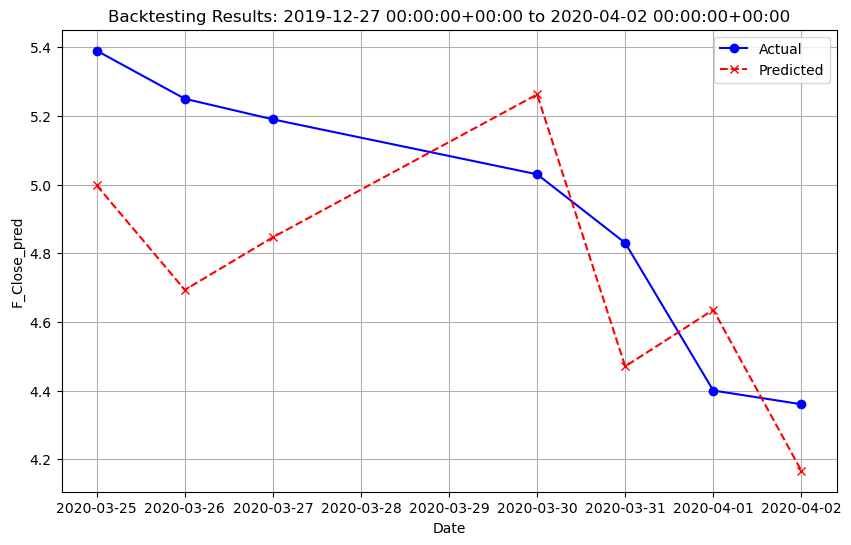

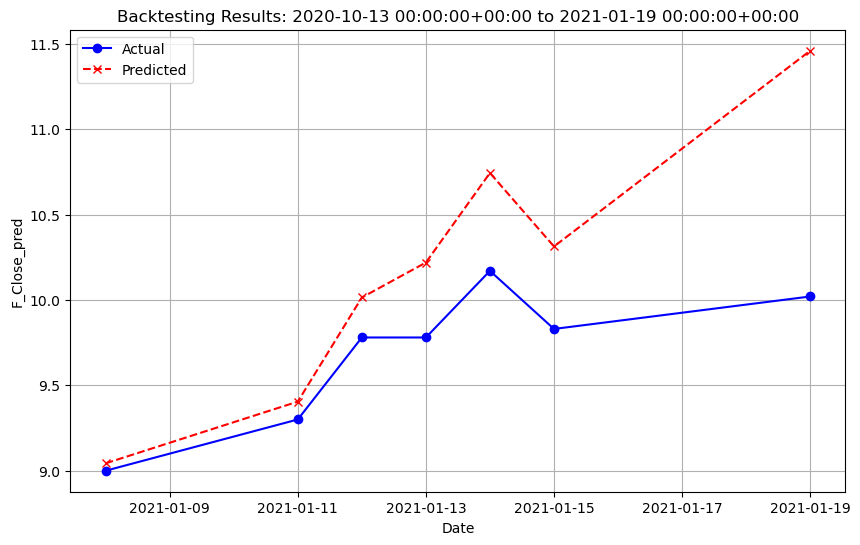

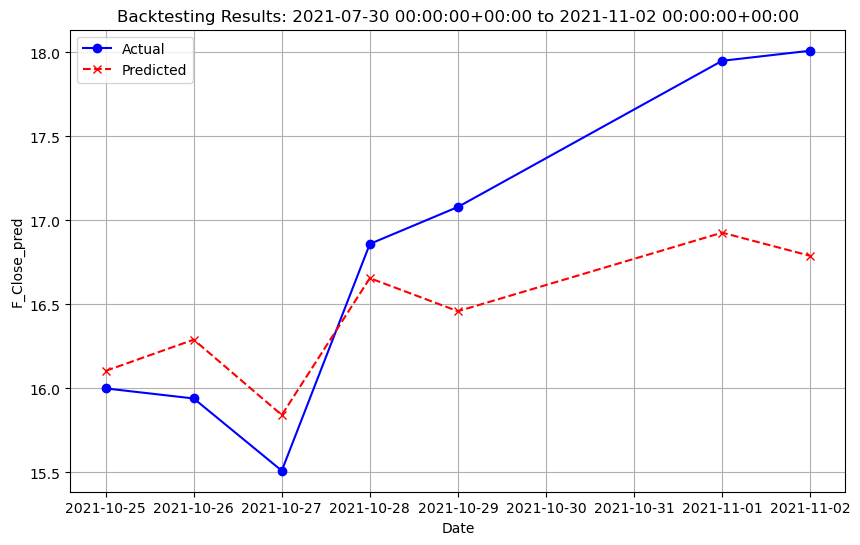

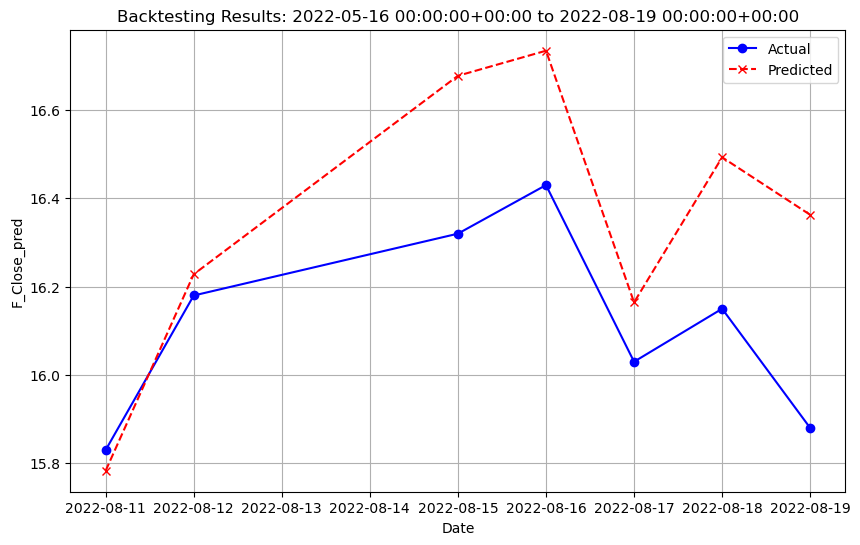

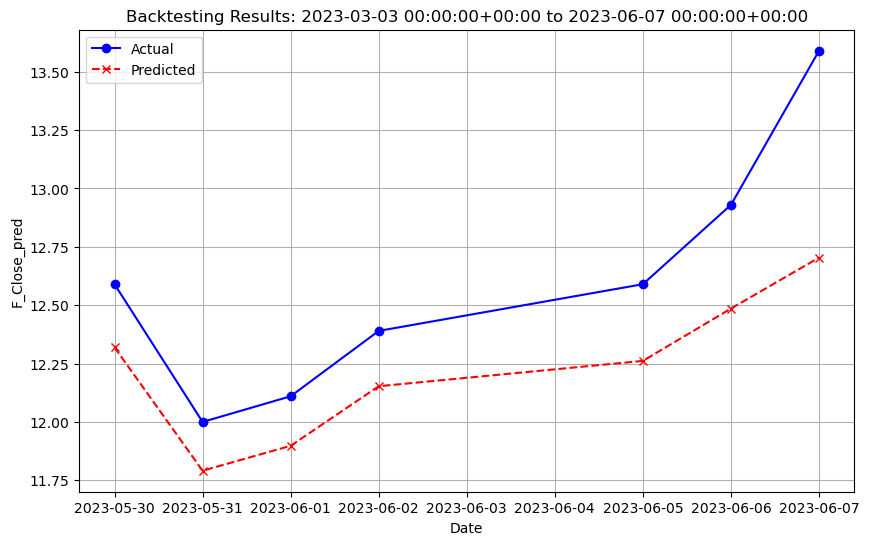

In [188]:
import matplotlib.pyplot as plt

def plot_backtesting_results(backtest_results, df):
    """
    Plot fitted model predictions vs real data for each backtest.
    """
    for idx, row in backtest_results.iterrows():
        # Extract the test period
        test_start = row['Test Start']
        test_end = row['Test End']

        # Filter the actual data for the test period
        test_data = df[(df['Date'] >= test_start) & (df['Date'] <= test_end)]
        y_test = test_data['F_Close_pred'].values

        # Extract predictions for the test period
        y_pred = row['Predictions']

        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(test_data['Date'], y_test, label='Actual', marker='o', linestyle='-', color='blue')
        plt.plot(test_data['Date'], y_pred, label='Predicted', marker='x', linestyle='--', color='red')
        plt.title(f"Backtesting Results: {row['Train Start']} to {row['Test End']}")
        plt.xlabel('Date')
        plt.ylabel('F_Close_pred')
        plt.legend()
        plt.grid(True)
        plt.show()

# Include Predictions in the Backtest Results
def rolling_backtesting_with_predictions(df, num_backtests=5, window_size_months=2, test_days=7):
    """
    Perform rolling backtesting and include predictions for plotting.
    """
    backtest_results = []
    start_idx = 0
    total_data_points = len(df)
    backtest_count = 0  # To count the number of backtests performed

    while (
        start_idx + window_size_months * 30 + test_days <= total_data_points 
        and backtest_count < num_backtests
    ):
        # Calculate start and end indices for training and testing
        train_start_idx = start_idx
        train_end_idx = train_start_idx + window_size_months * 30
        test_start_idx = train_end_idx
        test_end_idx = test_start_idx + test_days

        # Prepare the training and testing datasets
        train_data = df.iloc[train_start_idx:train_end_idx]
        test_data = df.iloc[test_start_idx:test_end_idx]

        # Features and target for training
        X_train = train_data.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
        y_train = train_data['F_Close_pred']

        # Features and target for testing
        X_test = test_data.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
        y_test = test_data['F_Close_pred']

        # Preprocess the data
        X_train_scaled = scaler.fit_transform(X_train)
        X_train_transformed = power_transformer.fit_transform(X_train_scaled)
        X_test_scaled = scaler.transform(X_test)
        X_test_transformed = power_transformer.transform(X_test_scaled)

        # Step 4: Set up parameter grids for hyperparameter tuning
        ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
        lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
        elastic_net_params = {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}

        # Initialize models
        ridge = Ridge()
        lasso = Lasso()
        elastic_net = ElasticNet()

        # TimeSeriesSplit for cross-validation
        tscv = TimeSeriesSplit(n_splits=5)

        # GridSearchCV with TimeSeriesSplit
        ridge_cv = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=tscv)
        lasso_cv = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=tscv)
        elastic_net_cv = GridSearchCV(elastic_net, elastic_net_params, scoring='neg_mean_squared_error', cv=tscv)

        # Fit models on training data
        ridge_cv.fit(X_train_transformed, y_train)
        lasso_cv.fit(X_train_transformed, y_train)
        elastic_net_cv.fit(X_train_transformed, y_train)

        # Find the best model for this training set
        best_model, best_mse = None, float('inf')
        for model_cv, name in [(ridge_cv, 'Ridge'), (lasso_cv, 'Lasso'), (elastic_net_cv, 'ElasticNet')]:
            if -model_cv.best_score_ < best_mse:
                best_mse = -model_cv.best_score_
                best_model = model_cv.best_estimator_

        # Train the best model on the training data
        best_model.fit(X_train_transformed, y_train)

        # Predict the next 7 days
        y_pred = best_model.predict(X_test_transformed)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Append results to backtest_results
        backtest_results.append({
            'Train Start': train_data['Date'].iloc[0],
            'Train End': train_data['Date'].iloc[-1],
            'Test Start': test_data['Date'].iloc[0],
            'Test End': test_data['Date'].iloc[-1],
            'Best Model': str(best_model),
            'MSE': mse,
            'RMSE': rmse,
            'R²': r2,
            'Predictions': y_pred
        })

        # Increment the counter and move the window forward by the test period
        backtest_count += 1
        start_idx += 200

    return pd.DataFrame(backtest_results)

# Perform rolling backtesting and collect predictions
backtest_results_with_predictions = rolling_backtesting_with_predictions(df, num_backtests=5)

# Plot the results
plot_backtesting_results(backtest_results_with_predictions, df)
